In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data=pd.read_csv('gdrive/My Drive/POI.csv')
post=pd.read_csv('gdrive/My Drive/post_covid_placekeys.csv')

In [ ]:
post

,full_dataplacekey
0,zzy-223@627-wc7-st9
1,zzw-225@627-s8k-qs5
2,22d-224@627-s8h-whq
3,zzw-225@627-s8j-49z
4,zzy-223@627-s8j-dqf
...,...
1611,22d-223@627-rwb-xbk
1612,22r-222@627-rwb-xbk
1613,22j-222@627-rwc-py9
1614,223-222@627-rwy-6ff


In [ ]:
data=data[data.placekey.isin(post['full_dataplacekey'])]

In [ ]:
data

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,postal_code,status,geometry,distance_to_subway,distance_to_busstop,X500_same,X500_different,mix_index,commercial_percent,building_d,is_corner,st_width,distance_to_hospital,distance_to_pharmacy,avgvisit_bef,avgvisit_aft,change_.,change_num,percentage_poverty,percentage_unemployed,median_income,from_ari,is_closed,prediction,predicted_class,rf_predict,rf_proba
0,1,zzy-223@627-wc7-st9,The Alley LuJiaoXiang,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,40.729621,-73.991264,10003,NaN,POINT (-73.991264 40.729621),-0.559361,1.081323,-0.287757,2.562478,0.593163,1.486140,1.229599,0,0.084419,0.230710,-0.188960,765.642857,165.266667,-0.420552,-600.376191,-0.783584,-0.425827,2.127763,1,0,3.018555e-02,0,0,0.019858
1,2,zzw-225@627-s8k-qs5,Mayahuel Mariposa,Restaurants and Other Eating Places,Full-Service Restaurants,40.727036,-73.988199,10003,NaN,POINT (-73.98819899999999 40.727036),0.006800,-0.761289,2.058682,0.313029,0.238832,0.947248,0.823212,0,-0.643524,0.775605,-0.454217,11.928571,2.866667,-0.354105,-9.061905,-0.783584,-0.309791,0.011506,1,0,4.728764e-02,0,0,0.031504
2,3,22d-224@627-s8h-whq,Godiva Cafe,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,40.740358,-73.989665,10010,NaN,POINT (-73.989665 40.740358),-0.553061,-0.420513,-0.433757,1.675371,0.121092,1.527917,0.267512,0,0.375596,-0.284434,-0.329855,300.642857,29.333333,-0.741802,-271.309524,-0.783584,-1.043781,1.532388,1,0,3.835638e-01,1,0,0.387558
3,4,zzw-225@627-s8j-49z,Gramercy Food Market,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,40.736846,-73.981304,10010,NaN,POINT (-73.98130399999999 40.736846),0.201572,-0.556837,-0.819616,0.809387,0.494300,-0.161457,0.279703,0,1.394715,-0.615640,-0.360464,32.428571,26.066667,1.176304,-6.361905,-0.783584,-0.868623,1.311687,1,0,9.387294e-07,0,0,0.028039
4,5,zzy-223@627-s8j-dqf,The Halal Kitchen,Restaurants and Other Eating Places,Limited-Service Restaurants,40.735139,-73.992067,10003,NaN,POINT (-73.99206700000001 40.735139),-0.503189,-0.431844,-0.506758,1.157893,0.351298,0.866224,1.467777,0,0.957949,-1.012981,-0.170103,259.357143,63.066667,-0.346375,-196.290476,-0.783584,-0.343720,1.712396,1,0,4.974047e-02,0,0,0.026070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2047,22d-223@627-rwb-xbk,Castle Financial Services,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,40.845400,-73.866407,10462,NaN,POINT (-73.866407 40.8454),0.012588,-0.924453,-0.850902,-0.795854,-0.346700,-0.548266,-0.991635,0,1.540303,1.541736,-0.617421,20.857143,16.600000,1.154773,-4.257143,0.811553,2.144600,-0.693466,1,0,4.153724e-06,0,0,0.008521
2048,2049,22r-222@627-rwb-xbk,Anthony's Pizza,Restaurants and Other Eating Places,Full-Service Restaurants,40.845022,-73.866256,10462,NaN,POINT (-73.86625600000001 40.845022),0.080243,-1.050013,-0.725759,-0.922583,-0.346700,-0.548266,-0.991635,1,1.540303,1.531567,-0.486951,164.428571,98.400000,0.618506,-66.028571,0.811553,2.144600,-0.693466,1,0,2.372693e-04,0,0,0.005660
2050,2051,22j-222@627-rwc-py9,Top Choice Jamaican Restaurant,Restaurants and Other Eating Places,Full-Service Restaurants,40.854209,-73.866003,10462,NaN,POINT (-73.86600300000001 40.854209),-0.204994,0.811152,-0.694473,-0.869779,-0.723564,-0.488854,0.263944,0,-0.352347,0.495910,-0.752274,196.500000,93.133333,0.280444,-103.366667,-0.600436,0.687338,-0.592937,1,0,2.602483e-03,0,0,0.003636
2051,2052,223-222@627-rwy-6ff,King Coffee Services,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,40.834899,-73.841637,10462,NaN,POINT (-73.84163700000001 40.834899),0.104993,3.570856,-0.871759,-0.964827,1.993426,-0.565493,-1.118725,0,0.084419,2.459306,2.232546,107.000000,37.533333,-0.054107,-69.466667,0.609456,2.671526,-0.874277,1,0,1.084566e-02,0,0,0.028524


In [ ]:
len(data[data['is_closed']==1])

93

In [ ]:
sc = StandardScaler()

In [ ]:
y = data.iloc[:, 29]
X = data.iloc[:, 10:28]
y

0       0
1       0
2       0
3       0
4       0
       ..
2046    0
2048    0
2050    0
2051    0
2052    0
Name: is_closed, Length: 1616, dtype: int64

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.5605942 ,  1.07662199, -0.23456723, ..., -0.82859281,
        -0.44477198,  2.23799512],
       [-0.0356886 , -0.78040122,  2.14679936, ..., -0.82859281,
        -0.33224643,  0.08767203],
       [-0.55475329, -0.43696006, -0.38274115, ..., -0.82859281,
        -1.04403492,  1.63303611],
       ...,
       [-0.23204985,  0.80433852, -0.64733744, ..., -0.64805456,
         0.63472279, -0.52650198],
       [ 0.05534913,  3.58562671, -0.82726291, ...,  0.54459782,
         2.55889496, -0.8123707 ],
       [-0.20746333, -0.80423941, -0.75317595, ...,  0.81739205,
         1.90983751, -0.99728258]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=0) 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import GridSearchCV
# create pipeline and fit the model
pipeline = Pipeline([
    ('RandomForestClassifier', RandomForestRegressor(n_estimators=50))])

# we can specify parameters here we want to optimize
# notice the format - {'model__parameter': range}, this format should follow for all parameters
parameters = {'RandomForestClassifier__min_samples_split': np.arange(2, 15, 1),'RandomForestClassifier__min_samples_leaf': np.arange(2, 15, 1)}

# call the gridsearch method and fit
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=3, refit=True)

grid_search.fit(X, y)

Fitting 3 folds for each of 169 candidates, totalling 507 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('RandomForestClassifier',
                                        RandomForestRegressor(n_estimators=50))]),
             n_jobs=-1,
             param_grid={'RandomForestClassifier__min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'RandomForestClassifier__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             verbose=1)

In [ ]:
grid_search.best_params_

{'RandomForestClassifier__min_samples_leaf': 13,
 'RandomForestClassifier__min_samples_split': 3}

In [ ]:
rf = RandomForestClassifier(n_estimators=50,min_samples_leaf=13,min_samples_split=3)
rf.fit(X, y)
predicted = rf.predict(X)
ysocre=rf.predict_proba(X)[:,1]


In [ ]:
len(predicted)

1616

In [ ]:
r2_score(y,predicted)

0.14430347573761482

In [ ]:
data['rf_predict']=predicted
data['rf_proba']=ysocre
data['rf_predict']=data['rf_predict'].astype(int)
data['is_closed']=data['is_closed'].astype(int)
data=data.reset_index() 

In [ ]:
len(data[data['rf_predict']==0])

1597

In [ ]:
len(data)

1616

In [ ]:
data.to_csv(r'gdrive/My Drive/data.csv')

In [ ]:
data.sum()

Unnamed: 0                                                         1720925
placekey                 zzy-223@627-wc7-st9zzw-225@627-s8k-qs522d-224@...
location_name            The Alley LuJiaoXiangMayahuel MariposaGodiva C...
top_category             Restaurants and Other Eating PlacesRestaurants...
sub_category             Snack and Nonalcoholic Beverage BarsFull-Servi...
latitude                                                           65848.3
longitude                                                          -119466
postal_code                                                       17127115
geometry                 POINT (-73.991264 40.729621)POINT (-73.9881989...
distance_to_subway                                                  73.194
distance_to_busstop                                                21.0987
X500_same                                                         -91.5139
X500_different                                                    -94.3884
mix_index                

In [ ]:
correct=0
correctopen=0
correctclose=0
wrongopen=[]
wrongclose=0
for i in range(0,len(data)):
  if data.is_closed[i]==data.rf_predict[i]:
    correct=correct+1
  if data.is_closed[i]==data.rf_predict[i] and data.is_closed[i]==0:
    correctopen=correctopen+1
  if data.is_closed[i]==data.rf_predict[i] and data.is_closed[i]==1:
    correctclose=correctclose+1
  if data.is_closed[i]!=data.rf_predict[i] and data.is_closed[i]==0:
    wrongopen.append(i)
  if data.is_closed[i]!=data.rf_predict[i] and data.is_closed[i]==1:
    wrongclose=wrongclose+1
wrongopen

[]

In [ ]:
dfopen=pd.DataFrame()
dfclose=pd.DataFrame()
df=pd.DataFrame()
df1=pd.DataFrame()
for i in range(0,len(data)):
  if data.is_closed[i]!=data.rf_predict[i] and data.is_closed[i]==0:
    dfopen=dfopen.append(data[i:i+1])
  if data.is_closed[i]!=data.rf_predict[i] and data.is_closed[i]==1:
    dfclose=dfclose.append(data[i:i+1])
  if data.is_closed[i]!=data.rf_predict[i]:
    df=df.append(data[i:i+1])  
  if data.is_closed[i]==data.rf_predict[i]:
    df1=df1.append(data[i:i+1])   

In [ ]:
dfclose

,index,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,postal_code,status,geometry,distance_to_subway,distance_to_busstop,X500_same,X500_different,mix_index,commercial_percent,building_d,is_corner,st_width,distance_to_hospital,distance_to_pharmacy,avgvisit_bef,avgvisit_aft,change_.,change_num,percentage_poverty,percentage_unemployed,median_income,from_ari,is_closed,prediction,predicted_class,rf_predict,rf_proba
53,75,76,zzw-222@627-s8h-vzz,I Restaurant,Restaurants and Other Eating Places,Full-Service Restaurants,40.738804,-73.990026,10003,close,POINT (-73.990026 40.738804),-0.287732,-0.296298,0.994963,0.313029,0.876280,1.337595,0.646520,0,0.375596,-0.571614,0.218984,158.000000,4.333333,-0.932302,-153.666667,-0.191912,-0.612562,1.716144,1,1,7.356714e-01,1,0,0.459163
70,96,97,22f-222@627-wc7-r6k,Plant Food Wine,Restaurants and Other Eating Places,Full-Service Restaurants,40.726004,-73.989789,10003,close,POINT (-73.989789 40.726004),-0.216570,-0.163798,1.641538,0.112374,0.238832,0.947248,0.823212,0,1.249126,0.835707,0.054054,17.571429,0.533333,-0.924355,-17.038095,-0.783584,-0.309791,0.011506,1,1,8.003685e-01,1,0,0.462674
111,154,155,22g-224@627-s8h-zs5,Pakeeza Deli,Grocery Stores,Convenience Stores,40.734815,-73.985679,10003,close,POINT (-73.985679 40.734815),-0.310403,-0.681335,-0.777902,2.161168,0.492712,-0.891876,-0.066142,0,-0.643524,-0.913496,0.168390,0.285714,0.000000,-1.006789,-0.285714,-0.783584,-0.767914,1.010000,1,1,9.319086e-01,1,0,0.447339
115,162,163,225-226@627-s8j-47q,Hunan East,Restaurants and Other Eating Places,Full-Service Restaurants,40.737706,-73.981393,10010,close,POINT (-73.981393 40.737706),0.116662,-1.069347,0.285817,-0.257253,0.494300,-0.161457,0.279703,0,1.394715,-0.425955,-0.894696,4.571429,4.666667,1.765697,0.095238,-0.783584,-0.868623,1.311687,1,1,1.550910e-08,0,0,0.133108
141,203,204,229-222@627-s8j-dd9,Di Fiore Marquet Cafe,Restaurants and Other Eating Places,Full-Service Restaurants,40.734293,-73.993358,10003,close,POINT (-73.993358 40.734293),-0.327953,-0.084269,0.400532,-0.077720,0.351298,0.866224,1.467777,0,-0.643524,-0.664215,-0.082990,88.428571,8.466667,-0.746752,-79.961905,-0.783584,-0.343720,1.712396,1,1,5.594307e-01,1,0,0.369584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,1990,1991,235-222@627-rwb-49z,Monti Diner,Restaurants and Other Eating Places,Full-Service Restaurants,40.882074,-73.882252,10467,close,POINT (-73.88225199999999 40.882074),-0.172253,-0.166064,-0.673616,-0.880340,-0.317671,-0.681004,-0.541179,0,2.268245,-0.972019,-0.573400,347.714286,144.333333,0.120561,-203.380952,1.220300,1.680989,-0.779337,1,1,1.056514e-02,0,0,0.095283
1576,2001,2002,225-223@627-rwb-qzz,Rawal Rawail,Restaurants and Other Eating Places,Full-Service Restaurants,40.854542,-73.868144,10462,close,POINT (-73.868144 40.854542),-0.302582,0.310470,-0.694473,-0.848658,-0.519812,-0.741740,-0.851699,0,-0.352347,0.253102,-0.331448,142.142857,24.000000,-0.548224,-118.142857,-0.418664,2.510588,-0.555189,1,1,6.217343e-01,1,0,0.280878
1578,2003,2004,22h-223@627-rwb-3nq,S&R Le Juice Bar & Cafe,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,40.879676,-73.875947,10467,close,POINT (-73.875947 40.879676),0.302635,0.499554,-0.840473,-0.732489,-0.334465,-1.361248,-2.124937,1,1.540303,-0.226985,-0.665294,261.571429,92.000000,-0.051550,-169.571429,1.719788,0.138009,-0.795802,1,1,4.141502e-02,0,0,0.142264
1599,2029,2030,23n-222@627-rwy-6x5,Bronx Burger Bistro,Restaurants and Other Eating Places,Full-Service Restaurants,40.837437,-73.847282,10462,close,POINT (-73.84728200000001 40.837437),-0.505206,2.256334,-0.788330,-0.933144,-0.325666,-1.043354,-0.963204,1,-0.643524,1.503142,-0.425002,177.428571,31.466667,-0.525128,-145.961905,0.668813,-0.697648,-0.877323,1,1,5.632595e-01,1,0,0.302584


In [ ]:
data[8:10]

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,postal_code,status,geometry,distance_to_subway,distance_to_busstop,X500_same,X500_different,mix_index,commercial_percent,building_d,is_corner,st_width,distance_to_hospital,distance_to_pharmacy,avgvisit_bef,avgvisit_aft,change_.,change_num,percentage_poverty,percentage_unemployed,median_income,from_ari,is_closed,prediction,predicted_class,rf_predict,rf_proba
8,9,22f-222@627-s8j-gzf,Tsurutontan Udon Noodle Brasserie,Restaurants and Other Eating Places,Full-Service Restaurants,40.736974,-73.991288,10003,NaN,POINT (-73.991288 40.736974),-0.487501,-0.351961,0.692533,0.059570,0.876280,1.337595,0.646520,0,-0.643524,-0.889272,-0.583824,336.214286,86.933333,-0.30455,-249.280952,-0.191912,-0.612562,1.716144,1,0,0.031505,0,0,0.000000
10,11,233-224@627-s8j-syv,Hey Chong Qing Noodle,Restaurants and Other Eating Places,Full-Service Restaurants,40.740459,-73.981757,10010,NaN,POINT (-73.981757 40.740459),-0.089453,0.004607,0.087674,-0.331179,-0.195214,-0.074433,-0.129507,0,2.268245,-0.136785,0.239700,76.285714,51.000000,0.80890,-25.285714,-0.283957,-0.981756,0.185424,1,0,0.000022,0,0,0.008136


In [ ]:
dfopen.to_csv(r'gdrive/My Drive/open.csv')
dfclose.to_csv(r'gdrive/My Drive/close.csv')

In [ ]:
len(dfopen)

14

In [ ]:
importance = rf.feature_importances_

In [ ]:
data.iloc[:, 10:28].columns

Index(['geometry', 'distance_to_subway', 'distance_to_busstop', 'X500_same',
       'X500_different', 'mix_index', 'commercial_percent', 'building_d',
       'is_corner', 'st_width', 'distance_to_hospital', 'distance_to_pharmacy',
       'avgvisit_bef', 'avgvisit_aft', 'change_.', 'change_num',
       'percentage_poverty', 'percentage_unemployed'],
      dtype='object')

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],"{:.2f}".format(y[i]))

No handles with labels found to put in legend.


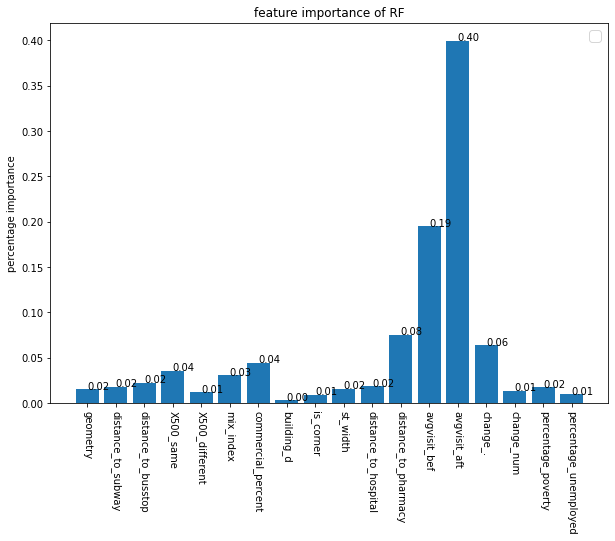

In [ ]:
import matplotlib.pyplot as plt
columns = data.iloc[:, 10:28].columns
fig = plt.figure(figsize=(10, 7))
plt.bar(columns,importance,)
plt.xticks(size=10,rotation=-90)
plt.title(label='feature importance of RF')
plt.ylabel(ylabel='percentage importance')
addlabels(columns,importance)
plt.legend(fontsize=15)


In [ ]:
importance[1].

0.004493771433606107

svm

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC().fit(X, y)
predicted_svc = clf.predict(X)

In [ ]:
predicted_svc

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
r2_score(y,predicted_svc)

0.8171316647562238

In [ ]:
data['svc_predict']=predicted_svc
data

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,postal_code,status,geometry,distance_to_subway,distance_to_busstop,X500_same,X500_different,mix_index,commercial_percent,building_d,is_corner,st_width,distance_to_hospital,distance_to_pharmacy,avgvisit_bef,avgvisit_aft,change_.,change_num,percentage_poverty,percentage_unemployed,median_income,from_ari,is_closed,prediction,predicted_class,rf_predict,rf_proba,svc_predict
0,1,zzy-223@627-wc7-st9,The Alley LuJiaoXiang,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,40.729621,-73.991264,10003,NaN,POINT (-73.991264 40.729621),-0.559361,1.081323,-0.287757,2.562478,0.593163,1.486140,1.229599,0,0.084419,0.230710,-0.188960,765.642857,165.266667,-0.420552,-600.376191,-0.783584,-0.425827,2.127763,1,0,3.018555e-02,0,0,0.022894,0
1,2,zzw-225@627-s8k-qs5,Mayahuel Mariposa,Restaurants and Other Eating Places,Full-Service Restaurants,40.727036,-73.988199,10003,NaN,POINT (-73.98819899999999 40.727036),0.006800,-0.761289,2.058682,0.313029,0.238832,0.947248,0.823212,0,-0.643524,0.775605,-0.454217,11.928571,2.866667,-0.354105,-9.061905,-0.783584,-0.309791,0.011506,1,0,4.728764e-02,0,0,0.070046,0
2,3,22d-224@627-s8h-whq,Godiva Cafe,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,40.740358,-73.989665,10010,NaN,POINT (-73.989665 40.740358),-0.553061,-0.420513,-0.433757,1.675371,0.121092,1.527917,0.267512,0,0.375596,-0.284434,-0.329855,300.642857,29.333333,-0.741802,-271.309524,-0.783584,-1.043781,1.532388,1,0,3.835638e-01,1,0,0.222332,0
3,4,zzw-225@627-s8j-49z,Gramercy Food Market,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,40.736846,-73.981304,10010,NaN,POINT (-73.98130399999999 40.736846),0.201572,-0.556837,-0.819616,0.809387,0.494300,-0.161457,0.279703,0,1.394715,-0.615640,-0.360464,32.428571,26.066667,1.176304,-6.361905,-0.783584,-0.868623,1.311687,1,0,9.387294e-07,0,0,0.035999,0
4,5,zzy-223@627-s8j-dqf,The Halal Kitchen,Restaurants and Other Eating Places,Limited-Service Restaurants,40.735139,-73.992067,10003,NaN,POINT (-73.99206700000001 40.735139),-0.503189,-0.431844,-0.506758,1.157893,0.351298,0.866224,1.467777,0,0.957949,-1.012981,-0.170103,259.357143,63.066667,-0.346375,-196.290476,-0.783584,-0.343720,1.712396,1,0,4.974047e-02,0,0,0.007359,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,2050,225-222@627-rw6-qfz,Gustoso Juice Bar,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,40.876732,-73.863876,10467,close,POINT (-73.863876 40.876732),-0.270958,-0.138445,-0.861331,-0.785293,-1.131994,-0.949513,-1.129307,1,-0.643524,0.228373,0.889397,159.214286,0.000000,-1.006789,-159.214286,1.308247,0.724920,-0.933845,1,1,9.826123e-01,1,1,0.949652,1
2050,2051,22j-222@627-rwc-py9,Top Choice Jamaican Restaurant,Restaurants and Other Eating Places,Full-Service Restaurants,40.854209,-73.866003,10462,NaN,POINT (-73.86600300000001 40.854209),-0.204994,0.811152,-0.694473,-0.869779,-0.723564,-0.488854,0.263944,0,-0.352347,0.495910,-0.752274,196.500000,93.133333,0.280444,-103.366667,-0.600436,0.687338,-0.592937,1,0,2.602483e-03,0,0,0.004615,0
2051,2052,223-222@627-rwy-6ff,King Coffee Services,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,40.834899,-73.841637,10462,NaN,POINT (-73.84163700000001 40.834899),0.104993,3.570856,-0.871759,-0.964827,1.993426,-0.565493,-1.118725,0,0.084419,2.459306,2.232546,107.000000,37.533333,-0.054107,-69.466667,0.609456,2.671526,-0.874277,1,0,1.084566e-02,0,0,0.009144,0
2052,2053,zzw-223@627-rwb-5mk,California Market,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,40.871450,-73.877424,10467,NaN,POINT (-73.877424 40.87145),-0.178476,-0.784942,-0.798759,-0.732489,1.238261,-0.752319,-1.379375,0,0.230007,1.065597,0.070852,5.285714,11.800000,5.056284,6.514286,0.886193,2.002224,-1.056260,1,0,2.220446e-16,0,0,0.021202,0


In [ ]:
dfopen1=pd.DataFrame()
dfclose1=pd.DataFrame()

for i in range(0,len(data)):
  if data.is_closed[i]!=data.svc_predict[i] and data.is_closed[i]==0:
    dfopen1=dfopen1.append(data[i:i+1])
  if data.is_closed[i]!=data.svc_predict[i] and data.is_closed[i]==1:
    dfclose1=dfclose1.append(data[i:i+1])

In [ ]:
dfopen1.to_csv(r'gdrive/My Drive/open1.csv')
dfclose1.to_csv(r'gdrive/My Drive/close1.csv')

In [ ]:
data.is_closed[12]

1

In [ ]:
data.describe()

,Unnamed: 0,latitude,longitude,postal_code,distance_to_subway,distance_to_busstop,X500_same,X500_different,mix_index,commercial_percent,building_d,is_corner,st_width,distance_to_hospital,distance_to_pharmacy,avgvisit_bef,avgvisit_aft,change_.,change_num,percentage_poverty,percentage_unemployed,median_income,from_ari,is_closed,prediction,predicted_class,rf_predict,rf_proba
count,2054.000000,2054.000000,2054.000000,2054.000000,2.054000e+03,2.054000e+03,2.054000e+03,2.054000e+03,2.054000e+03,2.054000e+03,2.054000e+03,2054.000000,2.054000e+03,2.054000e+03,2.054000e+03,2054.000000,2054.000000,2.054000e+03,2054.000000,2.054000e+03,2.054000e+03,2.054000e+03,2054.0,2054.000000,2.054000e+03,2054.000000,2054.000000,2054.000000
mean,1027.500000,40.746598,-73.932885,10549.414314,-8.428020e-17,4.345761e-17,-8.240190e-16,-1.028064e-16,-6.367297e-17,2.314483e-15,4.042423e-15,0.219085,-1.896676e-16,-3.524174e-17,-3.775515e-16,119.435422,41.588056,8.210461e-16,-77.847366,-5.172861e-15,1.297242e-17,-4.083610e-16,1.0,0.258520,2.585200e-01,0.278968,0.237585,0.256067
std,593.083046,0.049973,0.062473,582.247369,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.413727,1.000000e+00,1.000000e+00,1.000000e+00,146.032662,60.119714,1.000000e+00,110.723409,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.437928,3.790810e-01,0.448601,0.425707,0.386501
min,1.000000,40.691789,-74.002209,10003.000000,-6.168210e-01,-1.142714e+00,-8.717593e-01,-9.753874e-01,-4.951403e+00,-1.793622e+00,-2.720720e+00,0.000000,-2.827350e+00,-1.594480e+00,-9.468841e-01,0.285714,0.000000,-1.006789e+00,-1327.780952,-7.835838e-01,-1.773610e+00,-1.180348e+00,1.0,0.000000,2.220446e-16,0.000000,0.000000,0.000000
25%,514.250000,40.723784,-73.987882,10003.000000,-4.191978e-01,-6.993053e-01,-7.257587e-01,-7.852931e-01,-4.231155e-01,-7.913201e-01,-8.179135e-01,0.000000,-6.435237e-01,-7.547224e-01,-5.898663e-01,28.321429,1.333333,-7.325094e-01,-100.946429,-7.835838e-01,-6.125618e-01,-7.953669e-01,1.0,0.000000,7.129415e-04,0.000000,0.000000,0.012672
50%,1027.500000,40.732940,-73.943636,10462.000000,-2.478840e-01,-2.766816e-01,-4.233288e-01,-2.783751e-01,2.388322e-01,-1.614570e-01,2.675124e-01,0.000000,-3.523467e-01,-1.249414e-01,-3.130232e-01,74.500000,19.433333,-9.809234e-02,-44.700000,-3.906994e-01,-3.097913e-01,-4.250773e-01,1.0,0.000000,1.649472e-02,0.000000,0.000000,0.033270
75%,1540.750000,40.744436,-73.876956,11237.000000,-1.653034e-02,3.963896e-01,5.569613e-01,3.130293e-01,4.942997e-01,8.662240e-01,8.232116e-01,0.000000,3.755955e-01,4.567077e-01,1.841590e-01,158.321429,57.866667,3.859847e-01,-14.080952,6.442953e-01,4.593875e-01,4.093043e-01,1.0,1.000000,5.539507e-01,1.000000,0.000000,0.372175
max,2054.000000,40.893837,-73.777686,11365.000000,7.082177e+00,1.097246e+01,2.715685e+00,4.104354e+00,2.418764e+00,3.231552e+00,1.948928e+00,1.000000,2.559422e+00,3.945110e+00,1.060430e+01,1755.714286,626.666667,8.707489e+00,277.452381,7.449594e+00,4.027376e+00,2.442668e+00,1.0,1.000000,9.913364e-01,1.000000,1.000000,1.000000


In [ ]:
df1.describe()

,Unnamed: 0,latitude,longitude,postal_code,distance_to_subway,distance_to_busstop,X500_same,X500_different,mix_index,commercial_percent,building_d,is_corner,st_width,distance_to_hospital,distance_to_pharmacy,avgvisit_bef,avgvisit_aft,change_.,change_num,percentage_poverty,percentage_unemployed,median_income,from_ari,is_closed,prediction,predicted_class,rf_predict,rf_proba
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0,71.000000,7.100000e+01,71.000000,71.000000,71.000000
mean,929.774648,40.746483,-73.951015,10384.478873,-0.190937,-0.111314,0.058885,0.315112,0.147246,0.193002,0.121995,0.239437,0.108000,-0.154963,-0.153654,86.630785,18.968075,-0.445588,-67.662710,-0.227554,0.004146,0.256672,1.0,0.802817,4.341824e-01,0.619718,0.197183,0.359624
std,581.236396,0.050188,0.053616,530.195540,0.336711,0.844041,1.074847,1.212200,0.787294,0.995244,0.969108,0.429777,1.256308,0.819407,0.760511,120.461538,29.190207,0.687665,97.469872,0.785441,0.971942,1.066152,0.0,0.400704,3.167723e-01,0.488911,0.400704,0.171928
min,81.000000,40.693881,-73.993947,10003.000000,-0.585957,-1.124939,-0.861331,-0.943705,-2.995161,-1.793622,-2.124937,0.000000,-2.827350,-1.568962,-0.901867,0.285714,0.000000,-1.006789,-456.666667,-0.783584,-1.320143,-1.135538,1.0,0.000000,2.220446e-16,0.000000,0.000000,0.098404
25%,409.500000,40.726588,-73.988101,10003.000000,-0.389603,-0.661010,-0.767473,-0.721928,-0.184777,-0.761499,-0.888125,0.000000,-0.643524,-0.789676,-0.517261,6.035714,0.666667,-0.770462,-95.357143,-0.783584,-0.673467,-0.764010,1.0,1.000000,1.261047e-01,0.000000,0.000000,0.198687
50%,786.000000,40.734341,-73.984550,10010.000000,-0.266784,-0.312091,-0.465043,0.080692,0.238832,0.230537,0.430049,0.000000,-0.352347,-0.305657,-0.342802,38.071429,8.266667,-0.627240,-29.147619,-0.783584,-0.309791,0.011506,1.0,1.000000,4.405070e-01,1.000000,0.000000,0.363693
75%,1457.000000,40.740938,-73.932802,10836.500000,-0.114234,0.229242,0.588247,0.698498,0.482657,0.947248,0.823212,0.000000,1.321920,0.347661,0.040807,115.857143,23.100000,-0.331643,-3.354762,0.261154,0.463214,1.311687,1.0,1.000000,7.283911e-01,1.000000,0.000000,0.475992
max,2030.000000,40.882074,-73.815013,11355.000000,1.167331,3.345088,2.705257,3.787530,1.706070,2.436799,1.948928,1.000000,2.268245,2.931750,4.404930,548.000000,144.333333,3.180729,8.785714,1.719788,3.776086,2.442668,1.0,1.000000,9.807791e-01,1.000000,1.000000,0.883305


In [ ]:
data.is_corner.sum()/len(data)

0.21908471275559882

In [ ]:
df.describe()

,Unnamed: 0,latitude,longitude,postal_code,distance_to_subway,distance_to_busstop,X500_same,X500_different,mix_index,commercial_percent,building_d,is_corner,st_width,distance_to_hospital,distance_to_pharmacy,avgvisit_bef,avgvisit_aft,change_.,change_num,percentage_poverty,percentage_unemployed,median_income,from_ari,is_closed,prediction,predicted_class,rf_predict,rf_proba
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0,71.000000,7.100000e+01,71.000000,71.000000,71.000000
mean,929.774648,40.746483,-73.951015,10384.478873,-0.190937,-0.111314,0.058885,0.315112,0.147246,0.193002,0.121995,0.239437,0.108000,-0.154963,-0.153654,86.630785,18.968075,-0.445588,-67.662710,-0.227554,0.004146,0.256672,1.0,0.802817,4.341824e-01,0.619718,0.197183,0.359624
std,581.236396,0.050188,0.053616,530.195540,0.336711,0.844041,1.074847,1.212200,0.787294,0.995244,0.969108,0.429777,1.256308,0.819407,0.760511,120.461538,29.190207,0.687665,97.469872,0.785441,0.971942,1.066152,0.0,0.400704,3.167723e-01,0.488911,0.400704,0.171928
min,81.000000,40.693881,-73.993947,10003.000000,-0.585957,-1.124939,-0.861331,-0.943705,-2.995161,-1.793622,-2.124937,0.000000,-2.827350,-1.568962,-0.901867,0.285714,0.000000,-1.006789,-456.666667,-0.783584,-1.320143,-1.135538,1.0,0.000000,2.220446e-16,0.000000,0.000000,0.098404
25%,409.500000,40.726588,-73.988101,10003.000000,-0.389603,-0.661010,-0.767473,-0.721928,-0.184777,-0.761499,-0.888125,0.000000,-0.643524,-0.789676,-0.517261,6.035714,0.666667,-0.770462,-95.357143,-0.783584,-0.673467,-0.764010,1.0,1.000000,1.261047e-01,0.000000,0.000000,0.198687
50%,786.000000,40.734341,-73.984550,10010.000000,-0.266784,-0.312091,-0.465043,0.080692,0.238832,0.230537,0.430049,0.000000,-0.352347,-0.305657,-0.342802,38.071429,8.266667,-0.627240,-29.147619,-0.783584,-0.309791,0.011506,1.0,1.000000,4.405070e-01,1.000000,0.000000,0.363693
75%,1457.000000,40.740938,-73.932802,10836.500000,-0.114234,0.229242,0.588247,0.698498,0.482657,0.947248,0.823212,0.000000,1.321920,0.347661,0.040807,115.857143,23.100000,-0.331643,-3.354762,0.261154,0.463214,1.311687,1.0,1.000000,7.283911e-01,1.000000,0.000000,0.475992
max,2030.000000,40.882074,-73.815013,11355.000000,1.167331,3.345088,2.705257,3.787530,1.706070,2.436799,1.948928,1.000000,2.268245,2.931750,4.404930,548.000000,144.333333,3.180729,8.785714,1.719788,3.776086,2.442668,1.0,1.000000,9.807791e-01,1.000000,1.000000,0.883305


In [ ]:
df.is_corner.sum()/len(df)

0.23943661971830985

In [ ]:
len(dfopen)``

15

In [ ]:
dfopen2=pd.DataFrame()
dfclose2=pd.DataFrame()
for i in range(0,len(data)):
  if data.is_closed[i]!=data.predicted_class[i] and data.is_closed[i]==0:
    dfopen2=dfopen2.append(data[i:i+1])
  if data.is_closed[i]!=data.predicted_class[i] and data.is_closed[i]==1:
    dfclose2=dfclose2.append(data[i:i+1])

In [ ]:
len(dfopen2)

70

In [ ]:
data1=pd.read_csv('gdrive/My Drive/logistic_regression_predicted_results.csv')
data1

,Unnamed: 0,placekey,latitude,longitude,is_closed,predicted_class,location_name
0,1,zzy-223@627-wc7-st9,40.729621,-73.991264,0,0,The Alley LuJiaoXiang
1,2,zzw-225@627-s8k-qs5,40.727036,-73.988199,0,0,Mayahuel Mariposa
2,3,22d-224@627-s8h-whq,40.740358,-73.989665,0,1,Godiva Cafe
3,4,zzw-225@627-s8j-49z,40.736846,-73.981304,0,0,Gramercy Food Market
4,5,zzy-223@627-s8j-dqf,40.735139,-73.992067,0,0,The Halal Kitchen
...,...,...,...,...,...,...,...
2049,2050,225-222@627-rw6-qfz,40.876732,-73.863876,1,1,Gustoso Juice Bar
2050,2051,22j-222@627-rwc-py9,40.854209,-73.866003,0,0,Top Choice Jamaican Restaurant
2051,2052,223-222@627-rwy-6ff,40.834899,-73.841637,0,0,King Coffee Services
2052,2053,zzw-223@627-rwb-5mk,40.871450,-73.877424,0,0,California Market


In [ ]:
len(dfopen2)

50

In [ ]:
dfopen2=pd.DataFrame()
dfclose2=pd.DataFrame()
for i in range(0,len(data)):
  if data1.is_closed[i]!=data1.predicted_class[i] and data1.is_closed[i]==0:
    dfopen2=dfopen2.append(data1[i:i+1])
  if data1.is_closed[i]!=data1.predicted_class[i] and data1.is_closed[i]==1:
    dfclose2=dfclose2.append(data1[i:i+1])

In [ ]:
dfopen2.to_csv(r'gdrive/My Drive/open2.csv')
dfclose2.to_csv(r'gdrive/My Drive/close2.csv')